In [10]:
import numpy as np

In [12]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [14]:
t = [0,0,1,0,0,0,0,0,0,0]

In [16]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [18]:
mean_squared_error(np.array(y),np.array(t))

0.09750000000000003

In [20]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [22]:
mean_squared_error(np.array(y),np.array(t))

0.5975

In [25]:
def cross_entropy_error(y,t):
    delta = 1e-7 #加一个微小值防止log(0)输出-inf
    return - np.sum(t*np.log(y+delta))

In [27]:
t = [0,0,1,0,0,0,0,0,0,0]

In [29]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [31]:
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [33]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [35]:
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

In [37]:
#不好的例子

In [39]:
def numeriacl_diff(f,x):
    h = 10e-15
    return (f(x+h) - f(x)) / h

In [41]:
np.float32(1e-50) #舍入误差

0.0

In [43]:
#中心差分

In [45]:
def numerical_diff(f,x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h))/(2*h)

In [48]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
x = np.arange(0.0,20.0,0.1)
y = function_1(x)

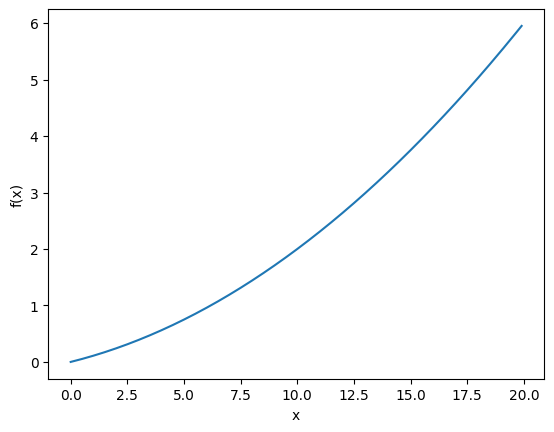

In [54]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [56]:
#计算x = 5,x = 10的对应位置的导数

In [58]:
numerical_diff(function_1,5)

0.1999999999990898

In [60]:
numerical_diff(function_1,10)

0.2999999999986347

In [62]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [64]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [71]:
numerical_diff(function_tmp1,3.0)

6.00000000000378

In [73]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [77]:
numerical_diff(function_tmp2,4.0)

7.999999999999119

In [79]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) #生成和x形状相同的0数组

    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val+h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val#还原值
    return grad

In [81]:
numerical_gradient(function_2,np.array([3.0,4.0]))
#输出为易读模式,值与上面相同

array([6., 8.])

In [83]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

In [85]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

In [88]:
#f为需要进行最优化的函数,init_x是初始值,lr是学习率(learning rate) step_num是重复次数
def gradient_descent(f,init_x,lr = 0.01,step_num = 100):
    x = init_x
#f为需要进行最优化的函数,init_x是初始值,lr是学习率(learning rate) step_num是重复次数
def gradient_descent(f,init_x,lr = 0.01,step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x

In [90]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [92]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x = init_x,lr = 0.1,step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [96]:
init_x = np.array([-3.0,4.0])

In [98]:
gradient_descent(function_2,init_x = init_x,lr = 10.0,step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [104]:
#上一次函数执行中,内部的x被修改了,需要再次进行初始化
#python默认的数据类型是不可变类型,但是numpy是可变类型
    #这里numpy类型中x与init_x默认共享内存且可变,如果x被改变,init_x也被改变,因为指向的内存地址不变
    #int类型虽然可共享内存,但是只要变化后就指向不同地址(隐式copy)
init_x = np.array([-3.0,4.0]) 

In [106]:
gradient_descent(function_2,init_x = init_x,lr = 1e-10 ,step_num = 100)

array([-2.99999994,  3.99999992])

In [117]:
from gradient_simplenet import simpleNet

In [119]:
net = simpleNet()

In [121]:
print(net.W)

[[-0.34309591 -0.78257472  1.278547  ]
 [ 0.16058666  0.71405122 -0.60857042]]


In [123]:
x = np.array([0.6,0.9])

In [125]:
p = net.predict(x)

In [127]:
print(p)

[-0.06132955  0.17310127  0.21941482]


In [129]:
np.argmax(p) #最大值索引)

2

In [131]:
t = np.array([0,0,1]) #正确解的标签

In [133]:
net.loss(x,t)

0.9969350468854428

In [136]:
def f(W):
    return net.loss(x,t)

In [140]:
dW = numerical_gradient(f,net.W) #需要在源代码中执行

IndexError: index 2 is out of bounds for axis 0 with size 2

In [39]:
from two_layer_net import *
import numpy as np

In [41]:
net = TwoLayerNet(input_size = 784,hidden_size = 100,output_size = 10)

In [43]:
net.params['W1'].shape

(784, 100)

In [45]:
net.params['b1'].shape

(100,)

In [47]:
net.params['W2'].shape

(100, 10)

In [49]:
net.params['b2'].shape

(10,)

In [51]:
x = np.random.rand(100,784) #伪输入数据(100个)

In [55]:
t = net.predict(x)

In [63]:
grads = net.numerical_gradient(x,t)

In [65]:
grads['W1'].shape

(784, 100)

In [69]:
grads['b1'].shape

(100,)

In [71]:
grads['W2'].shape

(100, 10)

In [73]:
grads['b2'].shape

(10,)

<function matplotlib.pyplot.show(close=None, block=None)>

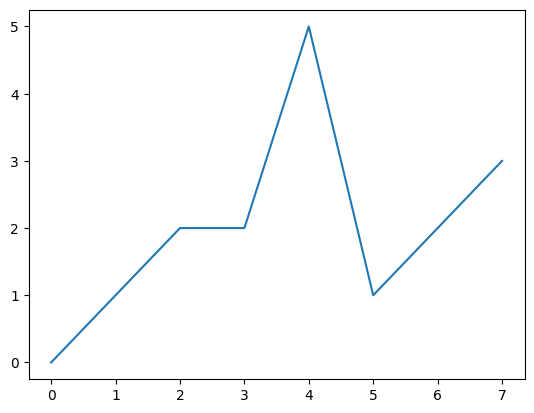

In [79]:
import matplotlib.pyplot as plt
train_loss_list = [0,1,2,2,5,1,2,3]
plt.plot(train_loss_list)
plt.show